In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
# library import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud


In [100]:
#read csv file 
df=pd.read_csv('ds_salaries new.csv')
#print head of data
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [101]:
#print tail of the data
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [102]:
#shape of the data rows and col
df.shape

(3755, 11)

#### df.describe()
    It provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset. The statistics computed include count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [103]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


#### df.info()
**df.info()** is a method in pandas used to print a concise summary of a DataFrame. It provides information about the DataFrame, including the data types of each column, the number of non-null values, and memory usage

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [105]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [106]:
df.size

41305

In [107]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [108]:
df.duplicated().value_counts()

False    2584
True     1171
dtype: int64

In [109]:
df.drop_duplicates(inplace=False).head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [110]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [114]:
# Calculate the correlation matrix
corr = df.corr()

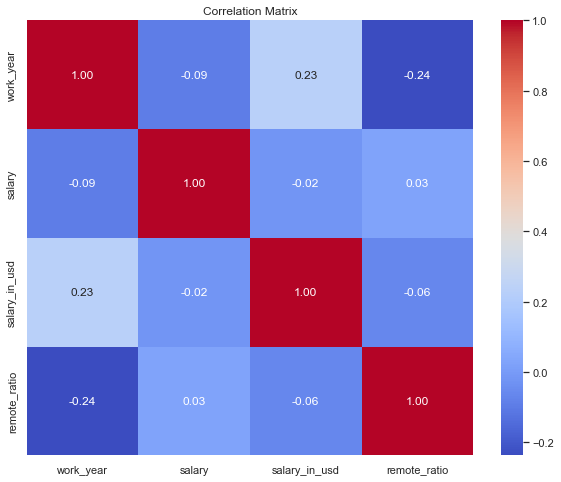

In [115]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns)

# Adding title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [95]:
 threshold = 2
# Calculate the Z-scores for the 'salary_in_usd' column
z_scores = stats.zscore(df['salary_in_usd'])
# Identify outliers using the threshold
outliers = (z_scores > threshold) | (z_scores < -threshold)
# Remove outliers from the DataFrame
df = df[~outliers]
# Display the shape after removing outliers
print(f"Shape after removing outliers: {df.shape}")

Shape after removing outliers: (3618, 11)


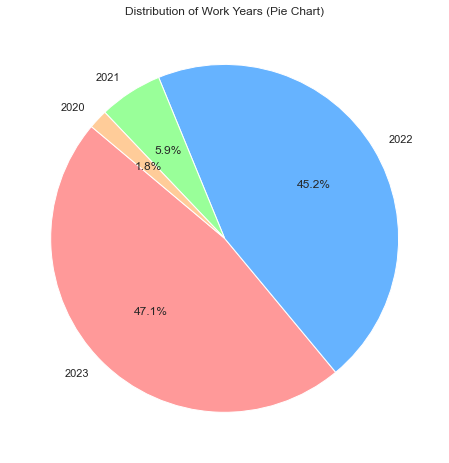

In [65]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Custom colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(8,8))
year_count_of_work = df['work_year'].value_counts()
plt.pie(year_count_of_work, labels=year_count_of_work.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Work Years (Pie Chart)')
plt.show()


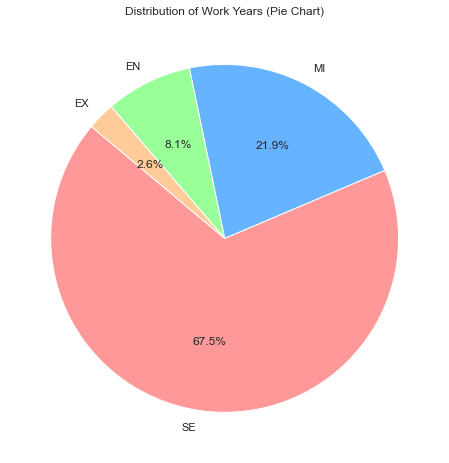

In [66]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Custom colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(8,8))
experience_level = df['experience_level'].value_counts()
plt.pie(experience_level, labels=experience_level.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Work Years (Pie Chart)')
plt.show()


Text(0, 0.5, 'Frequency')

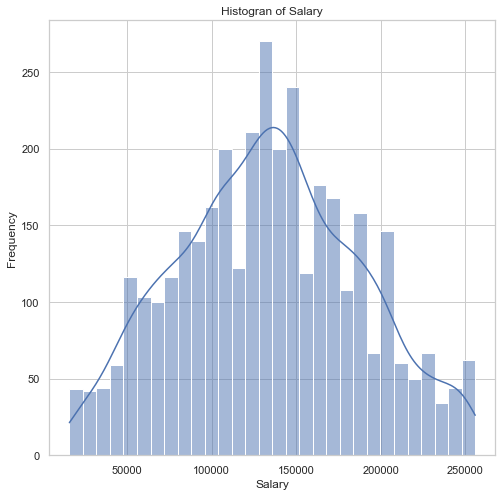

In [71]:
plt.figure(figsize=(8,8))
sns.histplot(df['salary_in_usd'] ,bins=30, kde=True)
plt.title('Histogran of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

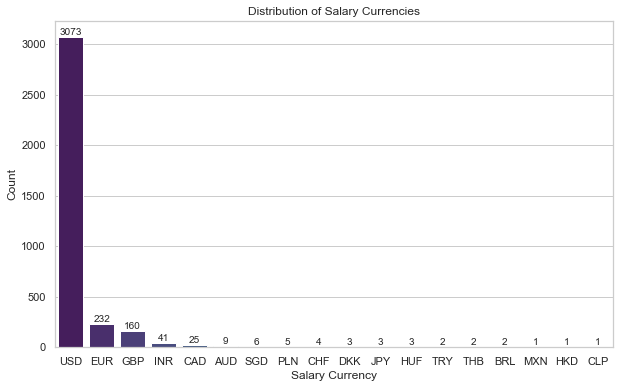

In [79]:
 # Get the counts and order the 'salary_currency' values in descending order
salary_currency_counts = df['salary_currency'].value_counts()
order = salary_currency_counts.index
# Visualizing 'salary_currency' as a bar plot with labels in descending order
plt.figure(figsize=(10, 6))
barplot = sns.countplot(x='salary_currency', data=df, order=order,palette='viridis')
# Adding labels with values
for index, value in enumerate(salary_currency_counts):
    barplot.text(index, value, f'{value}', ha="center", va="bottom", fontsize=10)
plt.title('Distribution of Salary Currencies')
plt.xlabel('Salary Currency')
plt.ylabel('Count')
plt.show()


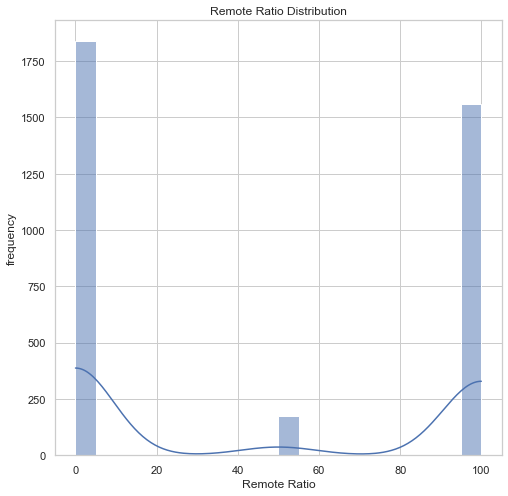

In [80]:
plt.figure(figsize=(8,8))
sns.histplot(df['remote_ratio'], bins=20, kde=True)
plt.title('Remote Ratio Distribution')
plt.xlabel('Remote Ratio')
plt.ylabel('frequency')
plt.show()

In [81]:
df['experience_level'].describe()

count     3573
unique       4
top         SE
freq      2412
Name: experience_level, dtype: object

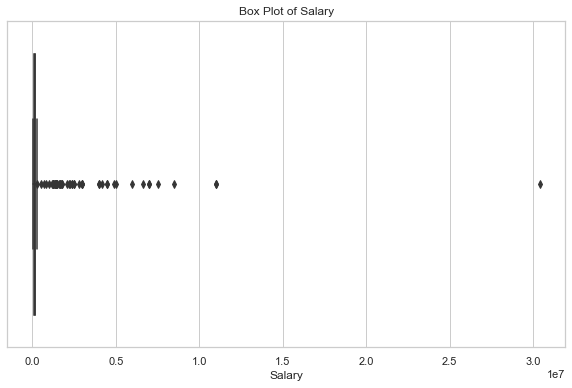

In [82]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for the 'salary' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', data=df, palette='viridis')

plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.show()
